Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Oleksii Stoliarchuk | 12346293 | 18.03.2024, 10:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &ndash; Recap Hands-on AI I (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter, A. Schörgenhumer, S. Luukkonen<br>
<b>Date:</b> 16-02-2024

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> Set the random seed with <code>u1.set_seed(123)</code> to enable reproducible results in all tasks that incorporate randomness (e.g., t-SNE, splitting data intro train and test sets, initializing weights of a neural network, running the model optimization with random batches, etc.). You must use <code>123</code> as seed.
</div>

In [21]:
# Import pre-defined utilities specific to this notebook.
import u1_utils as u1

# Import additional utilities needed in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from scipy import signal

# Set default plotting style.
sns.set_theme()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u1.setup_jupyter()

# Check minimum versions.
u1.check_module_versions()


Installed Python version: 3.12 (✓)
Installed numpy version: 1.26.4 (✓)
Installed pandas version: 2.2.1 (✓)
Installed PyTorch version: 2.2.1+cu121 (✓)
Installed scikit-learn version: 1.4.0 (✓)
Installed scipy version: 1.12.0 (✓)
Installed matplotlib version: 3.8.3 (✓)
Installed seaborn version: 0.13.2 (✓)
Installed PIL version: 10.2.0 (✓)


<h2>1. Tabular data</h2>

<p>In this exercise you'll be working with another famous data set, the <i>iris</i> data set. [<a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">1</a>]. Publication:

<center><cite>Fisher,R.A. - The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936)</cite></center>

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Load the <i>iris</i> data set using the appropriate function as supplied by us.</li>
        <li>Split the data set into the feature vector matrix and the label vector.</li>
        <li>Visualize the data set in tabular form.</li>
    </ul>
</div>

In [22]:
u1.set_seed(123)

data_iris = u1.load_iris()
data_iris_X, data_iris_y = data_iris.drop(columns='species'), data_iris['species']
data_iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<div class="alert alert-warning">
    <b>Exercise 1.2. [3 Points]</b>
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>class</i>)?</li>
        <li>How many different classes are there?</li>
    </ul>
</div>

- 150 samples
- 4 features
- 3 classes

<div class="alert alert-warning">
    <b>Exercise 1.3. [3 Points]</b>
    <ul>
        <li>Compute a pairplot of the data set with respect to all features.</li>
    </ul>
</div>

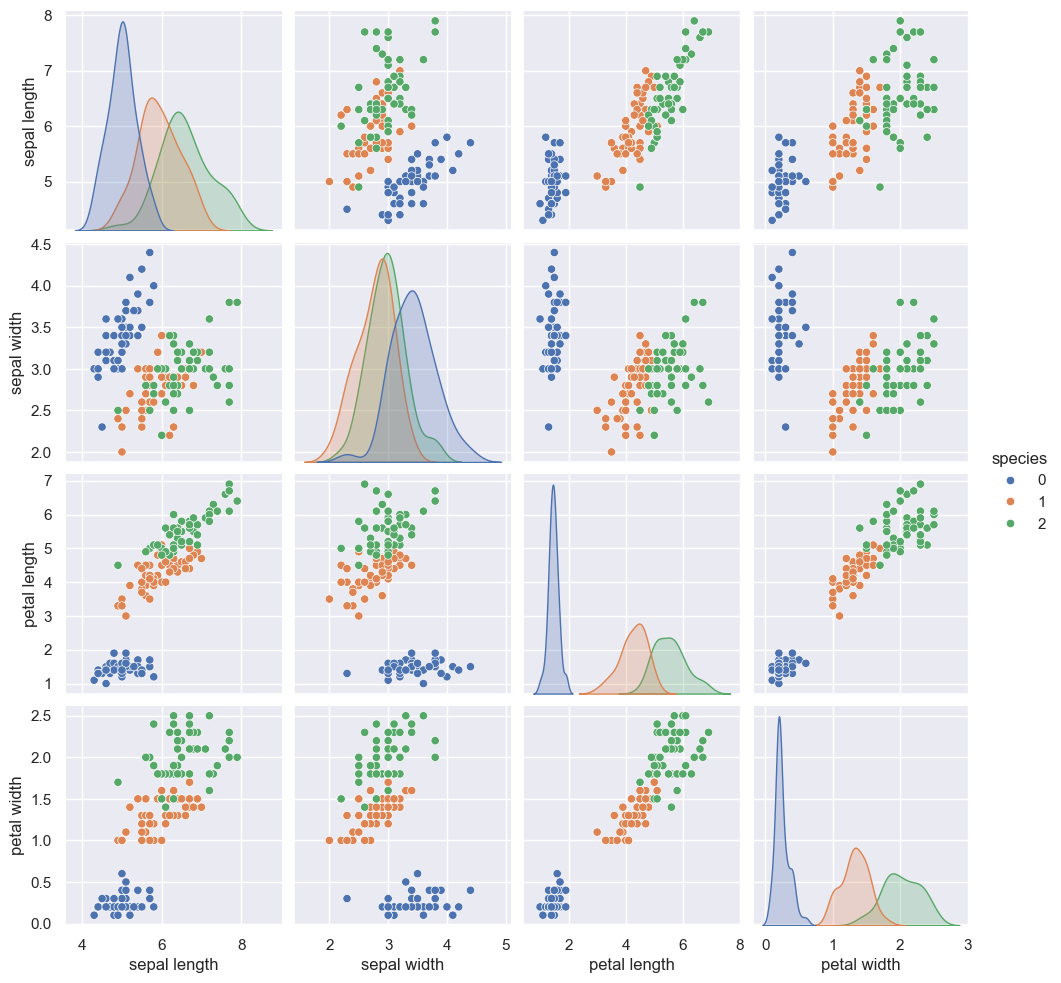

In [23]:
u1.set_seed(123)

num_labels = data_iris_y.unique().size
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
sns.pairplot(data_iris, vars=features, hue='species', palette='deep')
plt.show()

<div class="alert alert-warning">
    <b>Exercise 1.4. [2 Points]</b>
    <ul>
        <li>Name one feature which might indicate linear separability of the classes.</li>
    </ul>
</div>

petal width

<div class="alert alert-warning">
    <b>Exercise 1.5. [3 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the data set using <i>PCA</i> with 2 components and visualize the downprojection.</li>
    </ul>
</div>

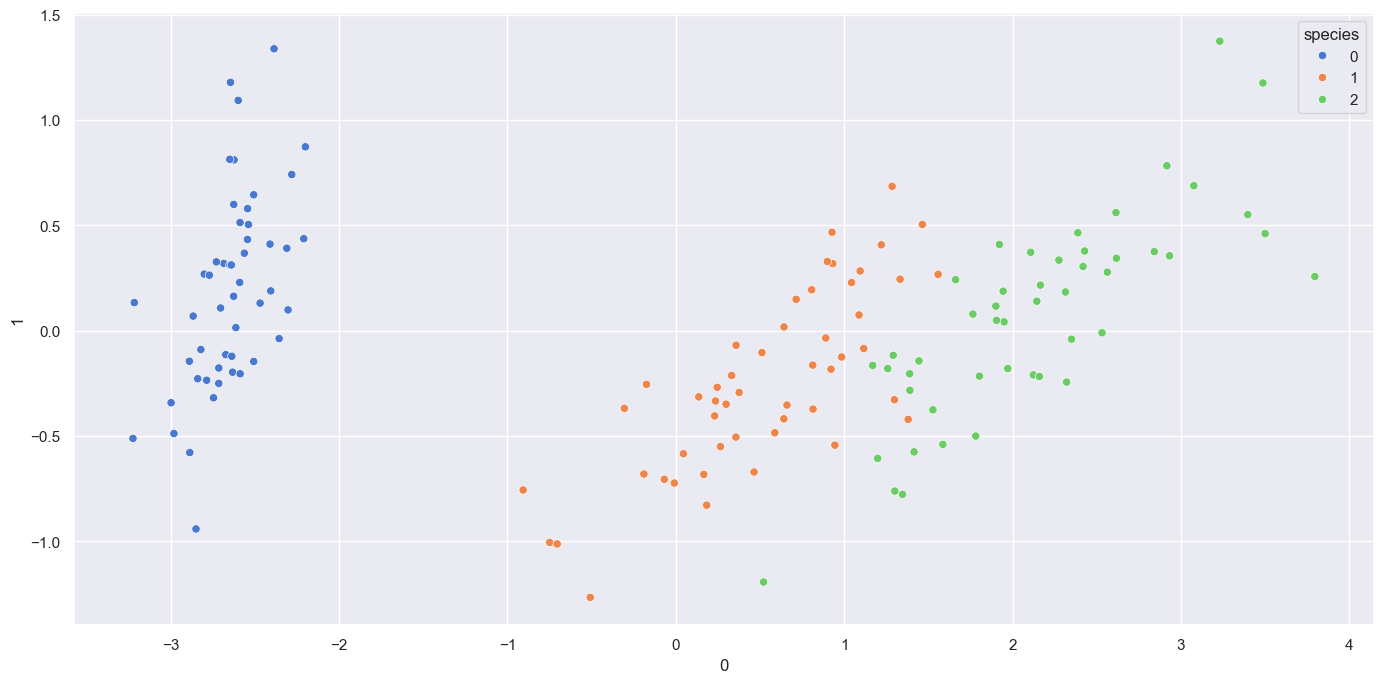

In [24]:
u1.set_seed(123)

data_iris_pca = u1.apply_pca(n_components=2, data=data_iris_X)
u1.plot_points_2d(data=data_iris_pca, targets=data_iris_y, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.6. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the original data set and plot the resulting clusters (the plotting must be done using the PCA-downprojected data).</li>
    </ul>
</div>

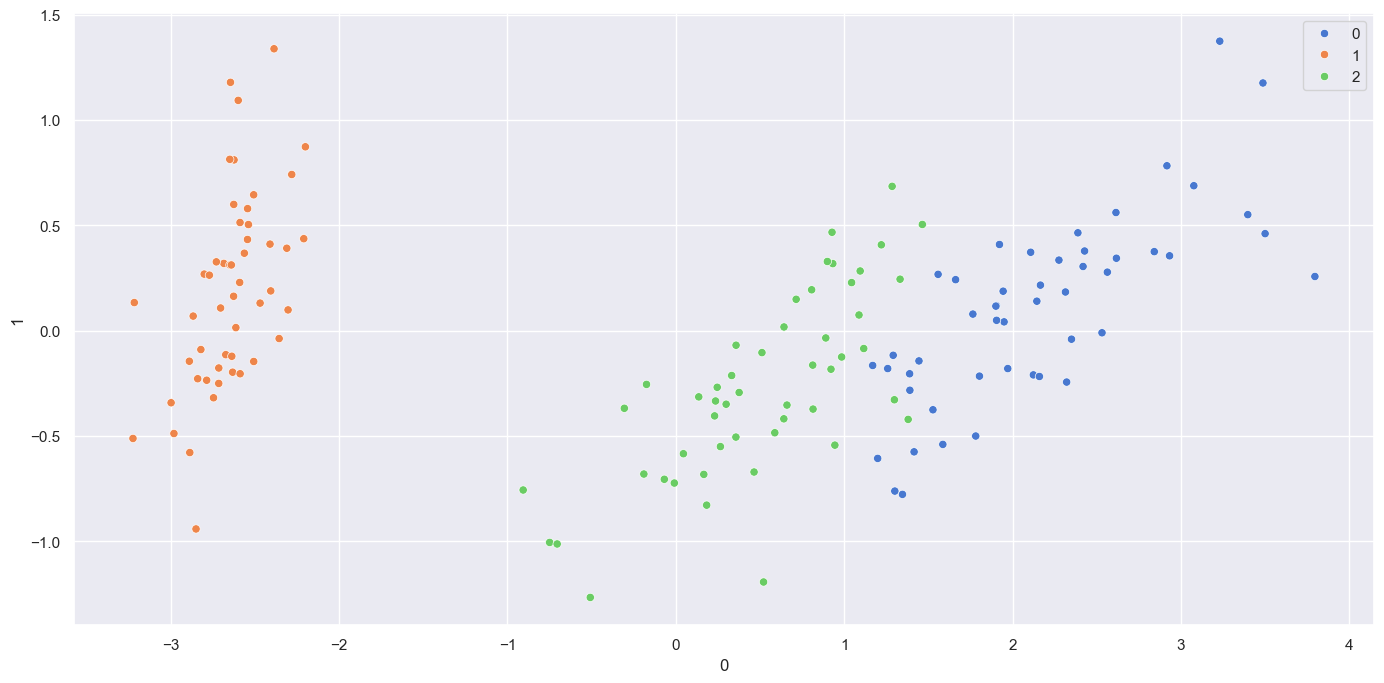

In [25]:
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris)
u1.plot_points_2d(data=data_iris_pca, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.7. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the PCA-downprojected data set and plot the resulting clusters.</li>
    </ul>
</div>

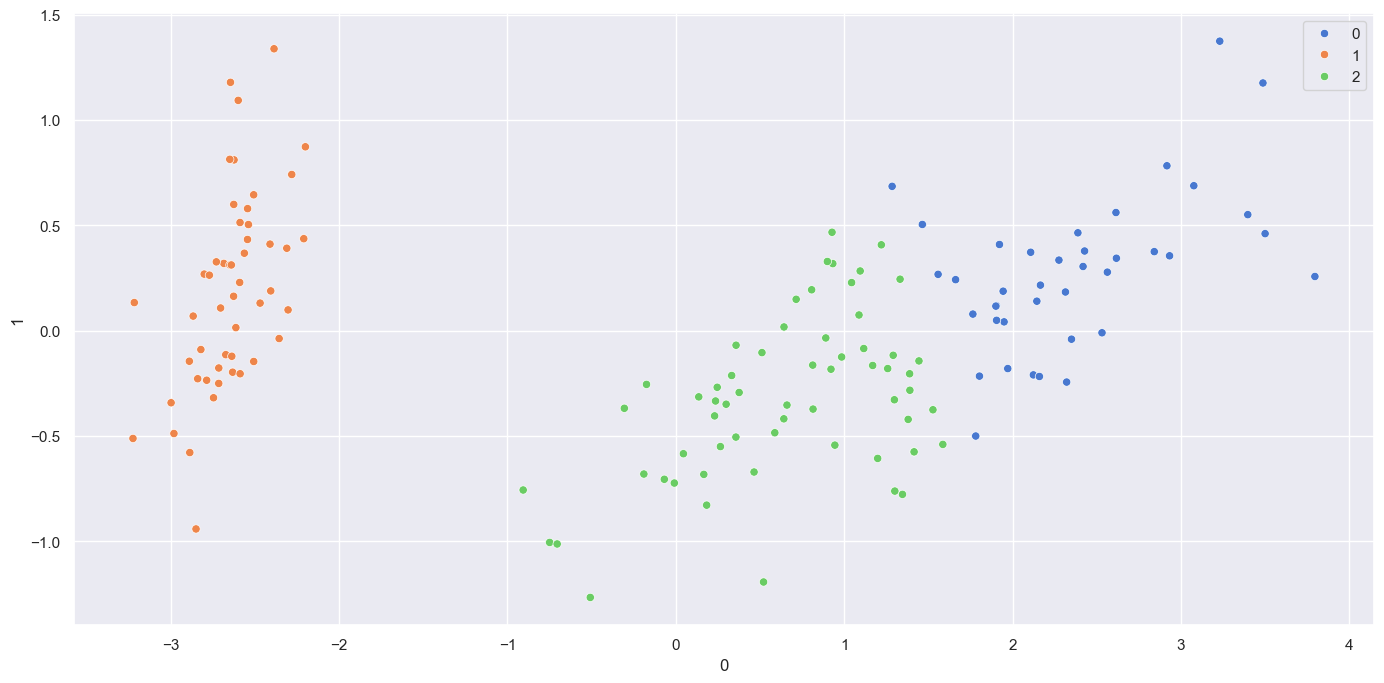

In [26]:
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris_pca)
u1.plot_points_2d(data=data_iris_pca, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.8. [3 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the data set using <i>t-SNE</i> with 2 components and visualize the downprojection.</li>
        <li>Choose a fitting perplexity.</li>
    </ul>
</div>

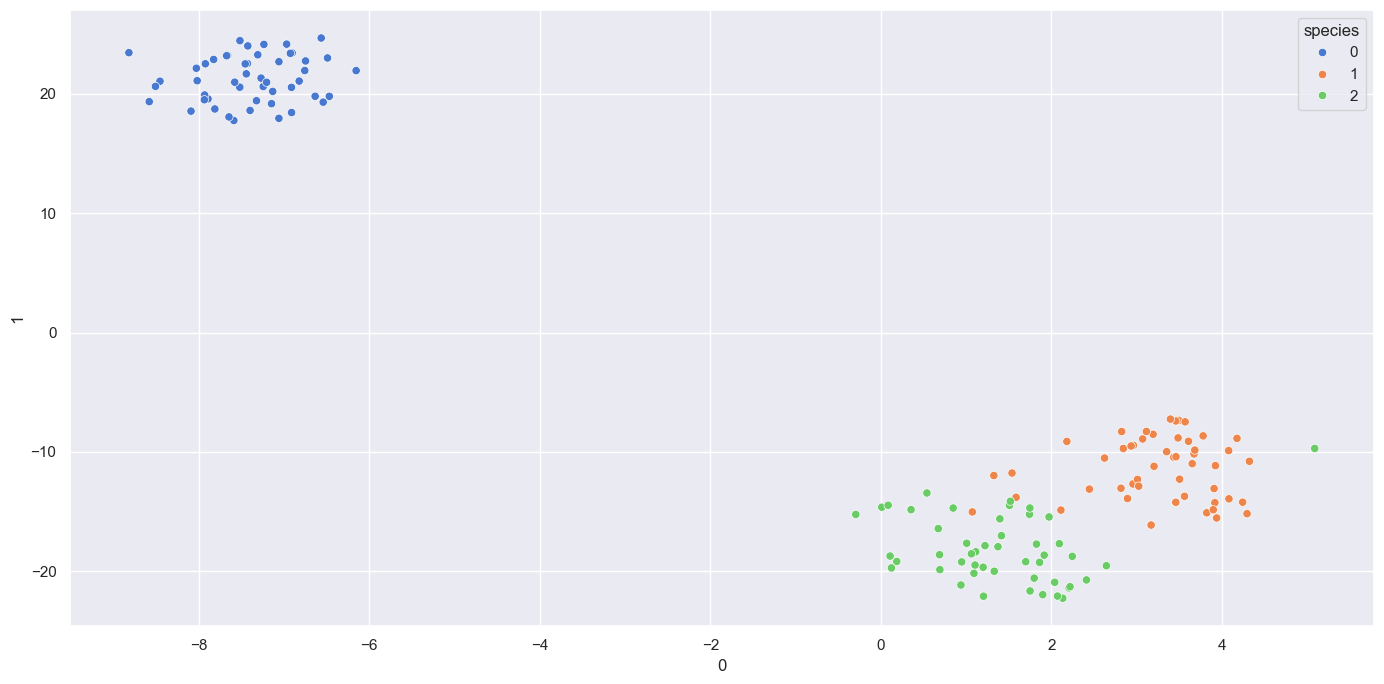

In [27]:
u1.set_seed(123)

data_iris_tsne = u1.apply_tsne(n_components=2, data=data_iris_X, perplexity=31)
u1.plot_points_2d(data=data_iris_tsne, targets=data_iris_y, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.9. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the original data set and plot the resulting clusters (the plotting must be done using the t-SNE-downprojected data).</li>
    </ul>
</div>

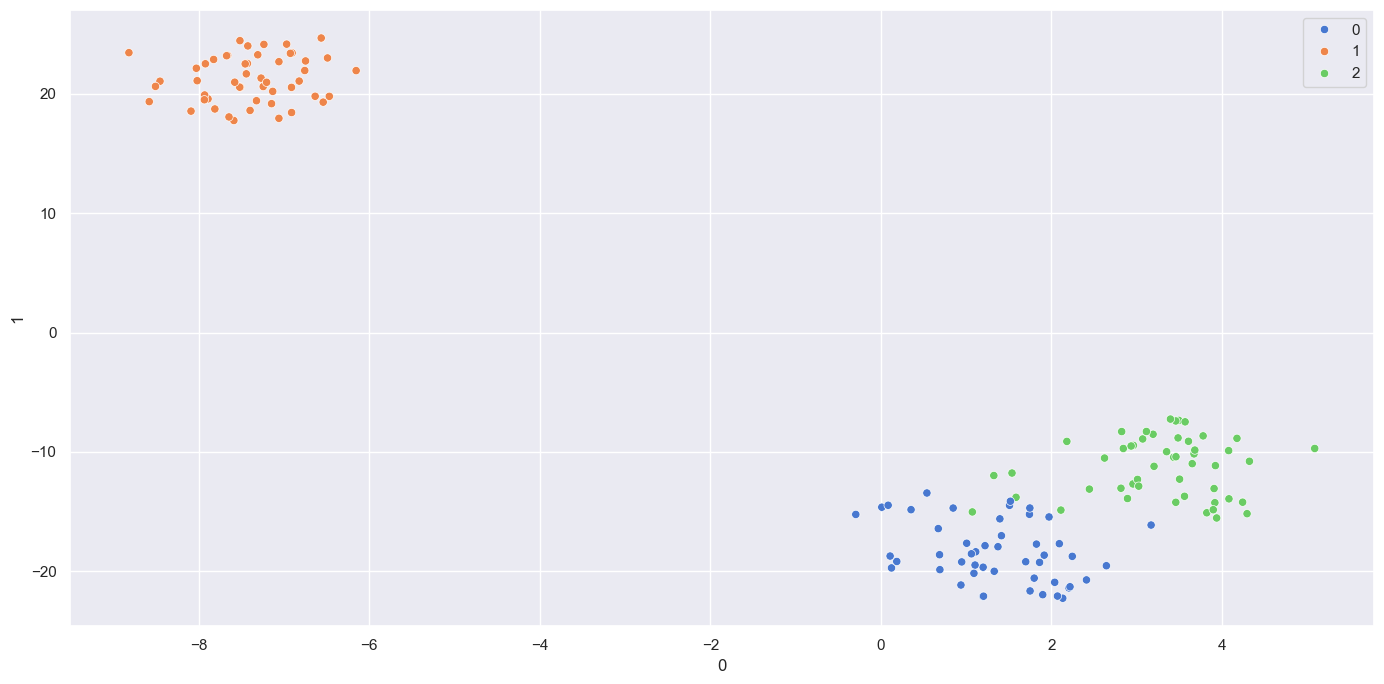

In [28]:
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris)
u1.plot_points_2d(data=data_iris_tsne, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.10. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the t-SNE-downprojected data set and plot the resulting clusters.</li>
    </ul>
</div>

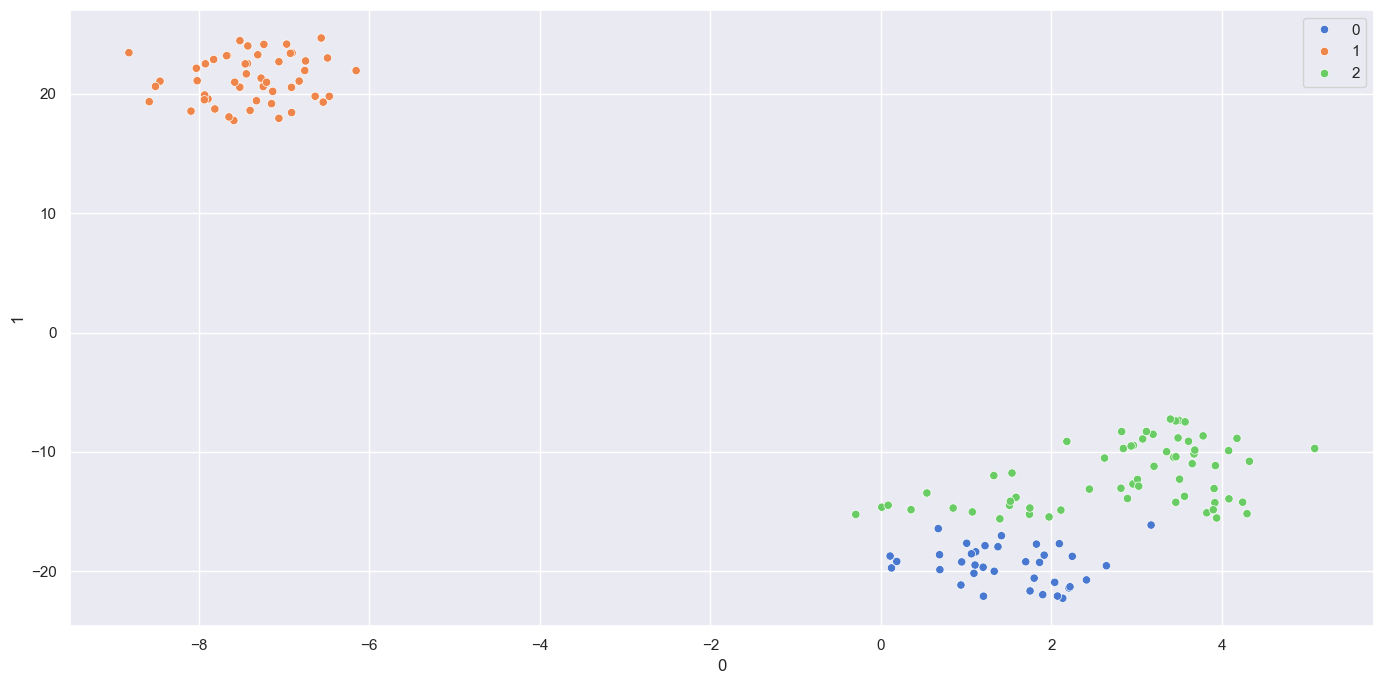

In [29]:
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris_tsne)
u1.plot_points_2d(data=data_iris_tsne, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.11. [2 Points]</b>
    <ul>
        <li>Compare and interpret the results.</li>
    </ul>
</div>

K-means algorithm applied to the original data set and to the 
downprojected data by PCA gives quite similar graphs. The only 
difference is that the distribution of some samples among the clusters 
is not completely the same.
K-means algorithm applied to the original data set and to the 
downprojected data by t-SNE gives quite similar graphs. The only 
difference is that the distribution of some samples among the clusters 
is not completely the same. 

<h2>2. Sequence data</h2>
<p>In this exercise you'll be working with <i>electricity demand</i> data as collected from the <i>Australian New South Wales Electricity Market</i>. It was first published/described by:</p>

<p><center><cite>M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999. </cite></center></p>

Currently, it is maintained by the <a href="https://www.openml.org/d/151">OpenML</a> project:

<center><cite>Joaquin Vanschoren, Jan N. van Rijn, Bernd Bischl, and Luis Torgo. OpenML: networked science in machine learning. SIGKDD Explorations 15(2), pp 49-60, 2013.</cite></center></p>
<center><cite>Matthias Feurer, Jan N. van Rijn, Arlind Kadra, Pieter Gijsbers, Neeratyoy Mallik, Sahithya Ravi, Andreas Mueller, Joaquin Vanschoren, Frank Hutter. OpenML-Python: an extensible Python API for OpenML. arXiv:1911.02490 [cs.LG], 2019</cite></center></p>

<div class="alert alert-warning">
    <b>Exercise 2.1. [2 Points]</b>
    <ul>
        <li>Load the <i>electricty</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the electricity data set in tabular form.</li>
    </ul>
</div>

In [30]:
u1.set_seed(123)

el_data = u1.load_electricity()
el_data

c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name electricity exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=151
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=43945

  warn(warning_msg)


,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,demand
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


<div class="alert alert-warning">
    <b>Exercise 2.2. [3 Points]</b>
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>demand</i>)?</li>
        <li>How many classes does the data set consist of?</li>
    </ul>
</div>

- 45312 samples
- 8 features
- 2 classes

<div class="alert alert-warning">
    <b>Exercise 2.3. [4 Points]</b>
    <ul>
        <li>Visualize the electricity data set using <i>lineplots</i> with <i>period</i> as the x-axis, once <i>nswprice</i> and once <i>nswdemand</i> as the y-axis, colored by the feature <i>day</i>.</li>
        <li>Do you observe any correlations between both plots?</li>
    </ul>
</div>

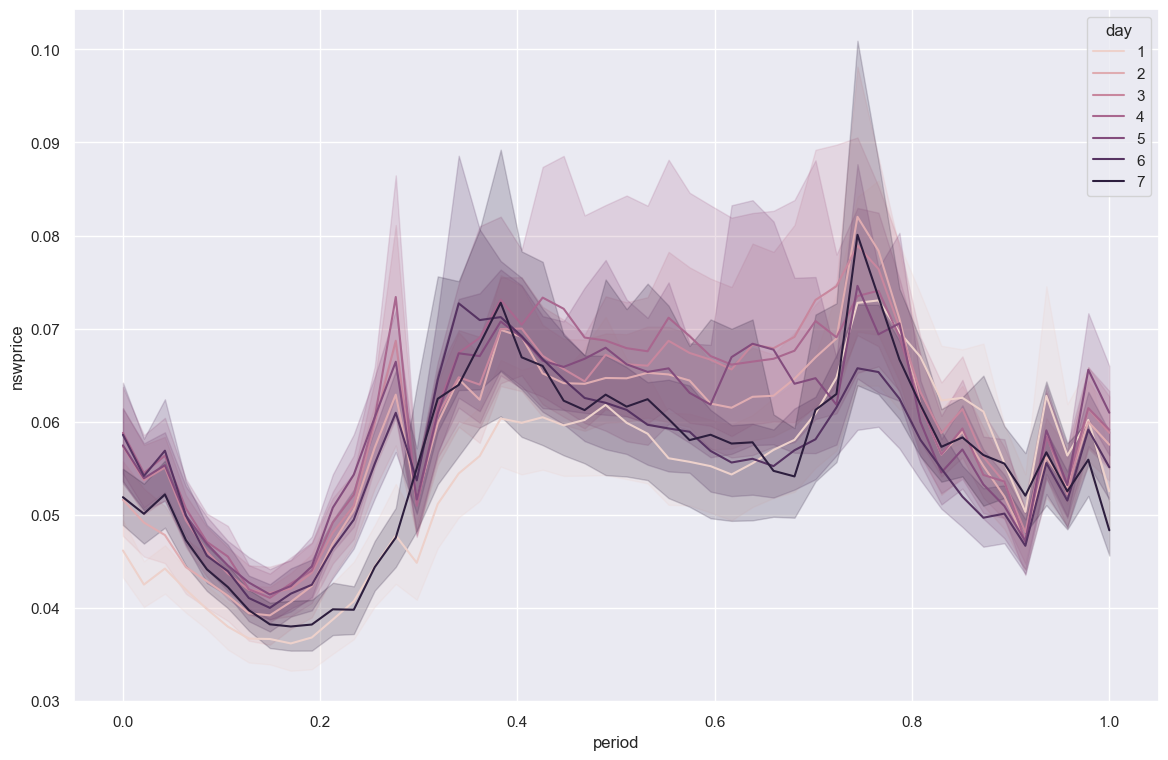

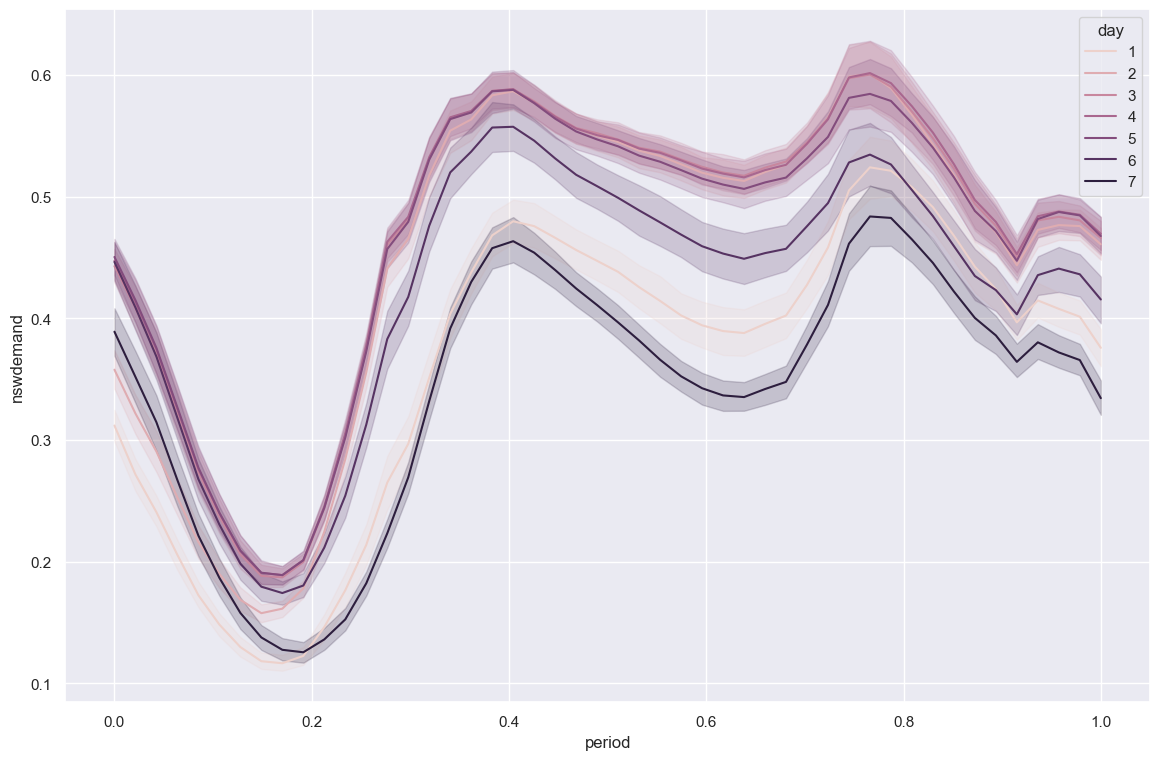

In [31]:
u1.set_seed(123)

fig_1, ax_1 = plt.subplots(1, 1, figsize=(14, 9))
sns.lineplot(x='period', y='nswprice', hue='day', data=el_data, ax=ax_1)

fig_2, ax_2 = plt.subplots(1, 1, figsize=(14, 9))
sns.lineplot(x='period', y='nswdemand', hue='day', data=el_data, ax=ax_2)

plt.show()

<div class="alert alert-warning">
    <b>Exercise 2.4. [2 Points]</b>
    <ul>
        <li>Do you observe any correlations between both plots?</li>
    </ul>
</div>

There's a correlation between nswprice and nswdemand

<div class="alert alert-warning">
    <b>Exercise 2.5. [5 Points]</b>
    <ul>
        <li>Compute the average electricity demand <i>per day</i> for <i>NSW</i> and <i>VIC</i>, as well as the average electricity transfer. Hint: have a look at the <a href="https://pandas.pydata.org/docs/user_guide/groupby.html#splitting-an-object-into-groups">pandas documentation</a> to group by <i>day</i>.</li>
        <li>Visualize the average electricity demand for <i>NSW</i> and <i>VIC</i>, as well as the average electricity transfer (the <i>day</i> should be on the x-axis).</li>
    </ul>
</div>

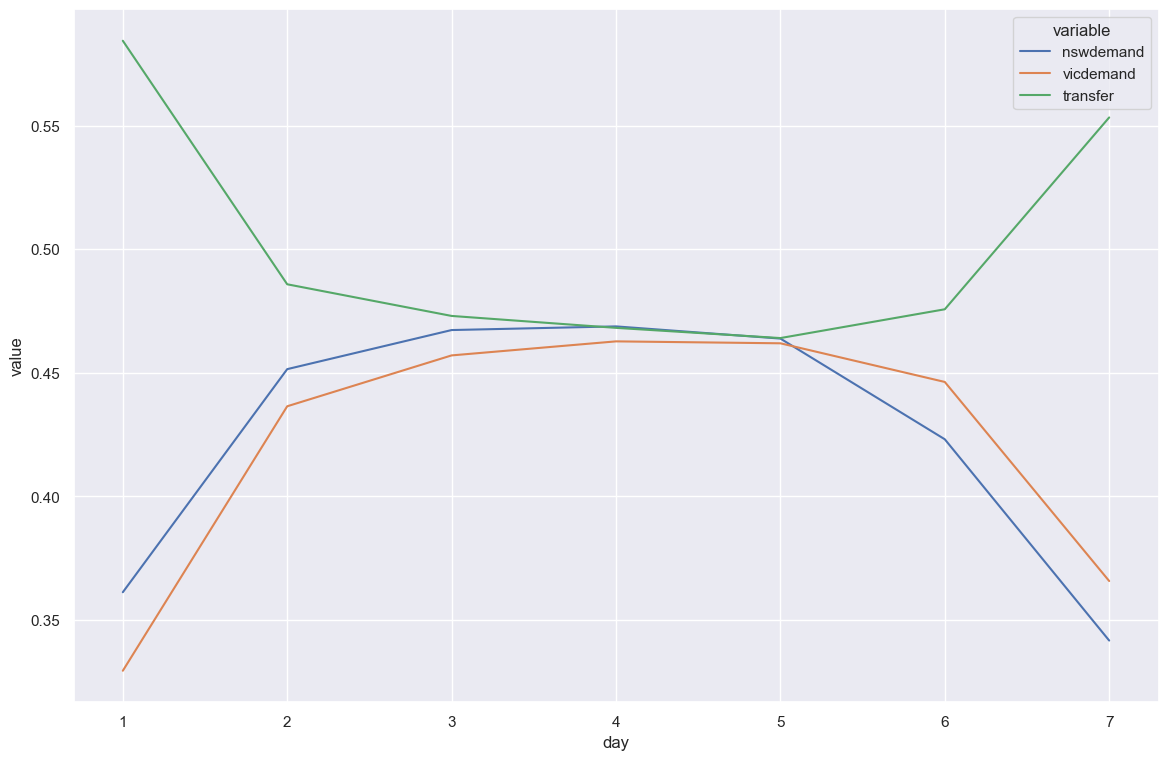

In [32]:
u1.set_seed(123)

el_data_mean = el_data.filter(
	['day', 'nswdemand', 'vicdemand', 'transfer']
).groupby('day').mean(numeric_only=True)

fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.lineplot(x='day', y='value', hue='variable', data=el_data_mean.reset_index().melt(id_vars='day'))
plt.show()

<div class="alert alert-warning">
    <b>Exercise 2.6. [2 Points]</b>
    <ul>
        <li>Does the above plot make sense?</li>
    </ul>
</div>

Yes, we can observe a correlation between average VIC and NSW demands, as well as an inverse correlation between them and average transfer.

<h2>3. Image data</h2>

<p>In this exercice you'll be working with a data set composed of various <i>images</i> of handwritten digits. The data set distinguishes <i>ten</i> different classes, one for each digit. For curious minds, more information regarding this data set can be found at:

<center><cite>Modified National Institute of Standards and Technology database of handwritten digits (MNIST).
        Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner.</cite></center>

<div class="alert alert-warning">
    <b>Exercise 3.1. [2 Points]</b>
    <ul>
        <li>Load the <i>MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the MNIST data set in tabular form.</li>
    </ul>
</div>

In [33]:
u1.set_seed(123)

mnist_data = u1.load_mnist()
mnist_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<div class="alert alert-warning">
    <b>Exercise 3.2. [10 Points]</b>
    <ul>
        <li>Define the following two $3 \times 3$ filters (shown in the formulae below) and apply them on 12 random images $A$ from the above data set (with $*$ as the convolution and $\sigma{}$ as the sigmoid operation) to produce the following 4 outputs $G_x, G'_x, G_y, G'_y$:</li>
    </ul>
    <p>
        \begin{equation}G_x = \left(
            \begin{array}{rrr}
                -5 & 0 & 5 \\
                -5 & 0 & 5 \\
                -5 & 0 & 5
            \end{array}\right) * A
            \qquad
            G'_x = \sigma (G_x)
        \end{equation}
    </p>
    <p>
        \begin{equation}G_y = \left(
            \begin{array}{rrr}
                -5 & -5 & -5 \\
                 0 &  0 &  0 \\
                 5 &  5 &  5
            \end{array}\right) * A
            \qquad
            G'_y = \sigma (G_y)
        \end{equation}
    </p>
    <ul>
        <li>Hint: Make sure to exclude the class label column <i>digit</i> before processing your data.</li>
    </ul>
</div>

In [34]:
u1.set_seed(123)

mnist_data_X, mnist_data_y = mnist_data.drop(columns='digit'), mnist_data['digit']
prewitt_x = np.asarray([
    [-5, 0, 5],
    [-5, 0, 5],
    [-5, 0, 5]
])
prewitt_y = np.asarray([
    [-5, -5, -5],
    [0, 0, 0],
    [5, 5, 5]
])

samples = np.array(mnist_data_X.sample(12)).reshape(12, 28, 28)
outputs = []
for sample in samples:
	gx = signal.convolve2d(sample, prewitt_x, mode='same')
	sigma_gx = torch.sigmoid(torch.from_numpy(gx))
	gy = signal.convolve2d(sample, prewitt_y, mode='same')
	sigma_gy = torch.sigmoid(torch.from_numpy(gy))
	outputs.append({'gx': gx, 'sigma_gx': sigma_gx, 'gy': gy, 'sigma_gy': sigma_gy})


<div class="alert alert-warning">
    <b>Exercise 3.3. [5 Points]</b>
    <ul>
        <li>Using the data of the 12 samples from above, create a plot with 5 rows (or 5 columns, choose what you like), where</li>
        <ul>
            <li>(1) shows the original samples</li>
            <li>(2) shows the samples after the convolution using the first filter, i.e., $G_x$</li>
            <li>(3) shows the samples after the convolution using the first filter and after the application of sigmoid, i.e., $G'_x$</li>
            <li>(4) shows the samples after the convolution using the second filter, i.e., $G_y$</li>
            <li>(5) shows the samples after the convolution using the second filter and after the application of sigmoid, i.e., $G'_y$</li>
        </ul>
    </ul>
</div>

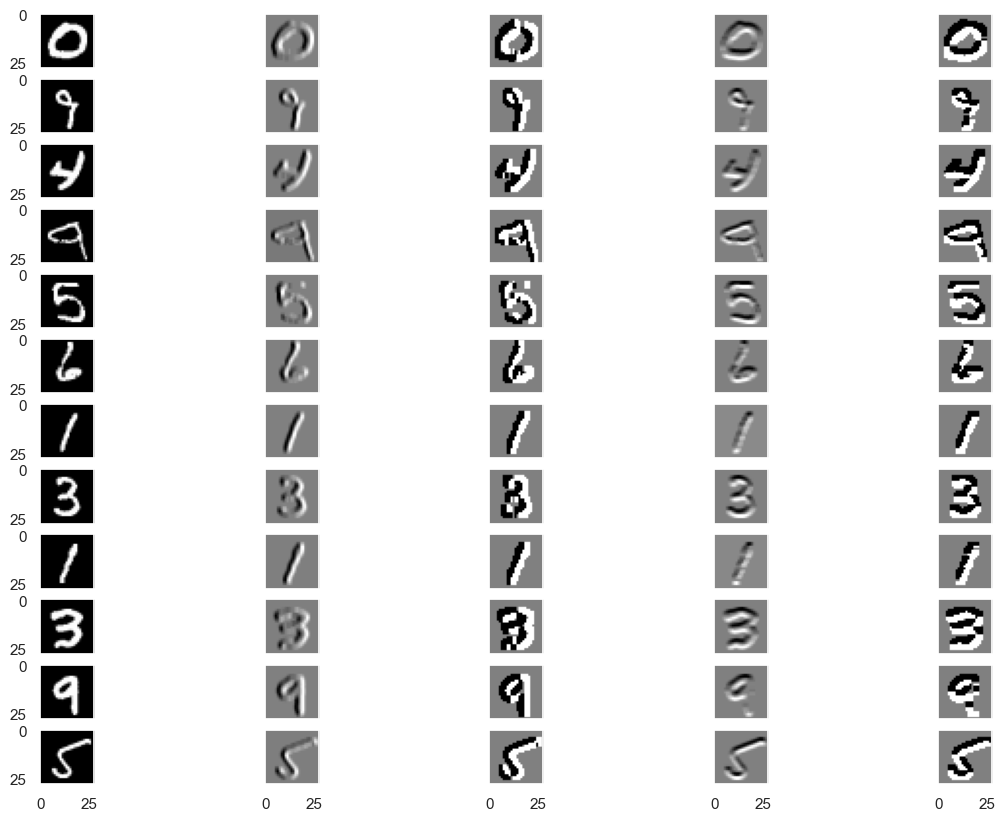

In [35]:
u1.set_seed(123)

fig, axs = plt.subplots(12, 5, figsize=(14, 10), sharex=True, sharey=True)
for i in axs:
	for j in i:
		j.grid(False)

for i, sample in enumerate(samples):
	axs[i][0].imshow(sample, cmap='gray')
	axs[i][1].imshow(outputs[i]['gx'], cmap='gray')
	axs[i][2].imshow(outputs[i]['sigma_gx'], cmap='gray')
	axs[i][3].imshow(outputs[i]['gy'], cmap='gray')
	axs[i][4].imshow(outputs[i]['sigma_gy'], cmap='gray')

plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.4. [8 Points]</b>
    <ul>
        <li>Implement a class <code>FNN</code> that derives from <code>torch.nn.Module</code> with the following architecture:</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28$ (flattened)</td>
        </tr>
        <tr>
            <td>1</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>2</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>4</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>5</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [36]:
u1.set_seed(123)

class FNN(torch.nn.Module):
	def __init__(self) -> None:
		super(FNN, self).__init__()
		self.flatten = torch.nn.Flatten()
		self.linear1 = torch.nn.Linear(28*28, 512)
		self.activation1 = torch.nn.ReLU()
		self.linear2 = torch.nn.Linear(512, 512)
		self.activation2 = torch.nn.ReLU()
		self.linear3 = torch.nn.Linear(512, 10)

	def forward(self, x: torch.Tensor):
		x = self.flatten(x)
		x = self.linear1(x)
		x = self.activation1(x)
		x = self.linear2(x)
		x = self.activation2(x)
		x = self.linear3(x)
		return x


<div class="alert alert-warning">
    <b>Exercise 3.5. [8 Points]</b>
    <ul>
        <li>Implement a class <code>CNN</code> that derives from <code>torch.nn.Module</code> with the following architecture:</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28$</td>
        </tr>
        <tr>
            <td>1</td>
            <td>2D convolution</td>
            <td>$32$ output channels and a kernel size of $3\times{}3$</td>
        </tr>
        <tr>
            <td>2</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>max pooling</td>
            <td>kernel size of $2\times{}2$</td>
        </tr>
        <tr>
            <td>4</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>5</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>6</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [37]:
u1.set_seed(123)

class CNN(torch.nn.Module):
	def __init__(self) -> None:
		super(CNN, self).__init__()
		self.conv = torch.nn.Conv2d(1, 32, 3)
		self.activation1 = torch.nn.ReLU()
		self.max_pooling = torch.nn.MaxPool2d(2)
		self.linear1 = torch.nn.Linear(32 * 13 * 13, 512)
		self.activation2 = torch.nn.ReLU()
		self.linear2 = torch.nn.Linear(512, 10)

	def forward(self, x: torch.Tensor):
		x = self.conv(x)
		x = self.activation1(x)
		x = self.max_pooling(x)
		x = x.view(-1, 32 * 13 * 13)
		x = self.linear1(x)
		x = self.activation2(x)
		x = self.linear2(x)
		return x


<div class="alert alert-warning">
    <b>Exercise 3.6. [3 Points]</b>
    <ul>
        <li>Split the MNIST data set in a <i>training</i> set ($75\%$) as well as <i>test</i> set ($25\%$).</li>
        <li>Print the size of the full data set, the training set and the test set.</li>
    </ul>
</div>

In [38]:
u1.set_seed(123)

mnist_train_data, mnist_test_data = u1.split_data(mnist_data, 0.25)
len(mnist_data), len(mnist_train_data), len(mnist_test_data)

(70000, 52500, 17500)

<div class="alert alert-warning">
    <b>Exercise 3.7. [5 Points]</b>
    <ul>
        <li>Create a corresponding <tt>TensorDataset</tt> for the training as well as the test set.</li>
        <li>Wrap the previously defined <tt>TensorDataset</tt> instances in separate <tt>DataLoader</tt> instances with a batch size of $32$ (shuffle the training data set).</li>
    </ul>
</div>

In [39]:
u1.set_seed(123)

tensor_mnist_train_data = torch.utils.data.TensorDataset(
	torch.from_numpy(mnist_train_data.drop(columns='digit').values).reshape(len(mnist_train_data), 1, 28, 28),
	torch.from_numpy(mnist_train_data['digit'].values),
)
tensor_mnist_test_data = torch.utils.data.TensorDataset(
	torch.from_numpy(mnist_test_data.drop(columns='digit').values).reshape(len(mnist_test_data), 1, 28, 28),
	torch.from_numpy(mnist_test_data['digit'].values),
)

loader_mnist_train_data = torch.utils.data.DataLoader(
	dataset=tensor_mnist_train_data,
	batch_size=32,
	shuffle=True,
)
loader_mnist_test_data = torch.utils.data.DataLoader(
	dataset=tensor_mnist_test_data,
	batch_size=32,
	shuffle=False,
)

<div class="alert alert-warning">
    <b>Exercise 3.8. [10 Points]</b>
    <ul>
        <li>For both an instance of your <code>FNN</code> and <code>CNN</code> model from above, train for $3$ epochs, print the training accuracy as well as the loss per epoch, and afterwards, print the final test set loss and accuracy.</li>
    </ul>
</div>

In [40]:
u1.set_seed(123)

target_device = torch.device('cuda')
fnn_model = FNN().to(target_device)
cnn_model = CNN().to(target_device)

fnn_model_optimizer = torch.optim.SGD(fnn_model.parameters(), lr=1e-3)
cnn_model_optimizer = torch.optim.SGD(cnn_model.parameters(), lr=1e-3)

num_epochs = 3

print('FNN:')
for epoch in range(num_epochs):
	u1.train_network(
		model=fnn_model,
		data_loader=loader_mnist_train_data,
		device=target_device,
		optimizer=fnn_model_optimizer,
	)
	performance = u1.test_network(
		model=fnn_model,
		data_loader=loader_mnist_train_data,
		device=target_device,
	)

	print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')

performance = u1.test_network(
	model=fnn_model,
	data_loader=loader_mnist_test_data,
	device=target_device,
)
print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

print('CNN:')
for epoch in range(num_epochs):
	u1.train_network(
		model=cnn_model,
		data_loader=loader_mnist_train_data,
		device=target_device,
		optimizer=cnn_model_optimizer,
	)
	performance = u1.test_network(
		model=cnn_model,
		data_loader=loader_mnist_train_data,
		device=target_device,
	)

	print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')

performance = u1.test_network(
	model=cnn_model,
	data_loader=loader_mnist_test_data,
	device=target_device,
)
print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

FNN:
Epoch: 1 / Train loss: 0.0033 / Train accuracy: 0.9682
Epoch: 2 / Train loss: 0.0019 / Train accuracy: 0.9825
Epoch: 3 / Train loss: 0.0011 / Train accuracy: 0.9908

Test loss: 0.0036 / Test accuracy: 0.9650
CNN:
Epoch: 1 / Train loss: 0.0026 / Train accuracy: 0.9743
Epoch: 2 / Train loss: 0.0015 / Train accuracy: 0.9840
Epoch: 3 / Train loss: 0.0008 / Train accuracy: 0.9928

Test loss: 0.0021 / Test accuracy: 0.9801
